<a href="https://colab.research.google.com/github/moeed17/Signal_Analysis/blob/main/Audio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following cells executes a simple code to perform a signal anlaysis on audio signal before and after perturbation. The audio files or wav files used here are taken from Nicolas Carlini's website of his work on imperceptible audio adversarial attacks.
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [98]:
pip install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
import numpy as np 
import librosa
import librosa.display

import matplotlib.pyplot as plt
from matplotlib import style

import IPython.display as ipd

import scipy
from scipy import stats
from scipy.fft import fft, fftfreq
from scipy.io import wavfile

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
%cd /content/drive/MyDrive/audio files
!cp -r '/content/drive/MyDrive/audio files/.' '/content/drive/MyDrive/Audio_Analysis'

/content/drive/.shortcut-targets-by-id/1LX9G5fBhdhaq3BPGN1b83ivdgWQCiw8Z/audio files


In [102]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [103]:
#setting the style of background for audio signal
plt.style.use('seaborn-dark-palette')

In [104]:
clean_audio_data = '/content/drive/MyDrive/Audio_Analysis/20db_clean.wav'
x , sr = librosa.load(clean_audio_data)
print(x, sr)

x,sr = librosa.load(clean_audio_data, sr=None)

print(sr)

[0. 0. 0. ... 0. 0. 0.] 22050
16000


In [105]:
# function to convert the information into 
# some readable format
def output_duration(length):
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds
  
    return hours, mins, seconds
  
# sample_rate holds the sample rate of the wav file
# in (sample/sec) format
# data is the numpy array that consists
# of actual data read from the wav file
sample_rate, data = wavfile.read('/content/drive/MyDrive/Audio_Analysis/20db_clean.wav')
  
len_data = len(data)  # holds length of the numpy array
  
t = len_data / sample_rate  # returns duration but in floats
  
hours, mins, seconds = output_duration(int(t))
print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))

Total Duration: 0:0:3


In [106]:
ipd.Audio(clean_audio_data)

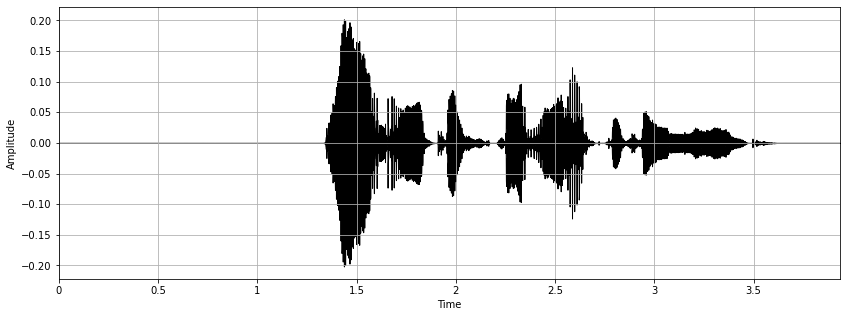

In [107]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [108]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print (sum(zero_crossings))

5022


15999.74593495935


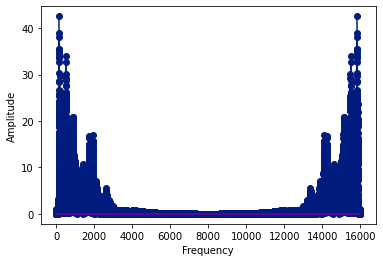

In [109]:
xft=fft(x)
N = len(xft)
n = np.arange(N)
T = N/sr
freq = n/T 
max_freq=freq.max()
print(max_freq)
plt.stem(freq, np.abs(xft))

#plt.xlim(0, 5000)

plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.show()

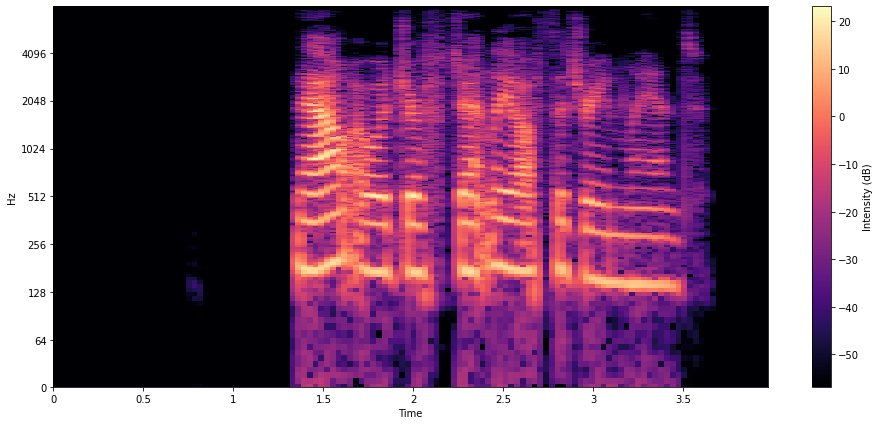

In [110]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(16, 7))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")

In [111]:
#Same code but passing the perturbed Audio Files
perturbed_audio_data = '/content/drive/MyDrive/Audio_Analysis/20db_perturbed.wav'
y , SR = librosa.load(perturbed_audio_data)
print(y,SR)

y,SR = librosa.load(perturbed_audio_data, sr=None)

print(SR)


[0.00516441 0.0045442  0.00211573 ... 0.00155976 0.00119957 0.        ] 22050
16000


In [112]:
ipd.Audio(perturbed_audio_data)

In [113]:
#Calulating SNR of Singal

def calculate_snr(original, noisy):
    #original = np.asarray(original)
    #noisy = np.asarray(noisy)
    original_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    snr = 10 * np.log10(original_power / noise_power)
    return snr
SNR=calculate_snr(x,y)
print("The SNR of signal is ", SNR)

The SNR of signal is  12.542601823806763


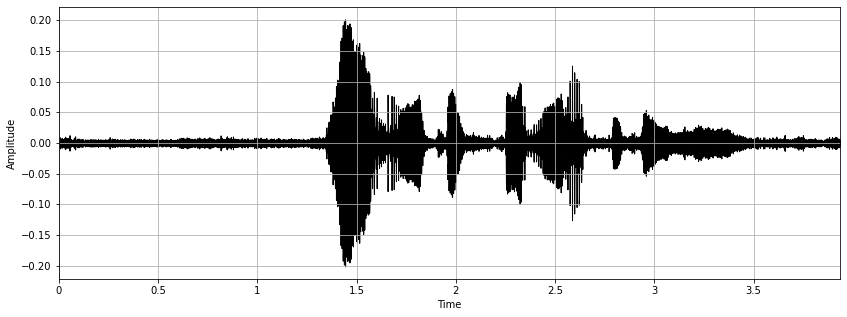

In [114]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=SR, color="black")
plt.ylabel("Amplitude")
plt.grid()

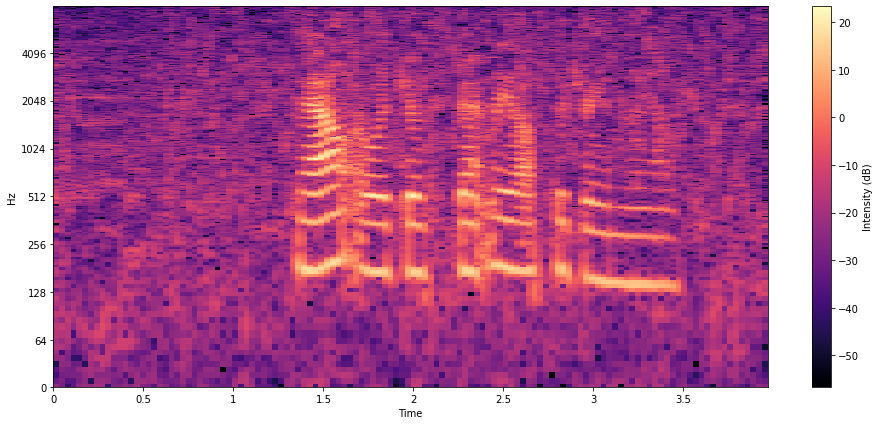

In [115]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(16, 7))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")

Following cells executes the same code but this time its Carlini's "imperctible" attack. The audio files are downloaded from his research paper referenced website (the very first 2 examples)
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [116]:
carlini_clean_audio_data = '/content/drive/MyDrive/Audio_Analysis/clean.wav'
cw , sr = librosa.load(carlini_clean_audio_data)
print(cw,sr)

cw,sr = librosa.load(carlini_clean_audio_data, sr=None)

print(sr)

[ 0.          0.          0.         ... -0.0276748  -0.02847217
  0.        ] 22050
16000


In [117]:
ipd.Audio(carlini_clean_audio_data)

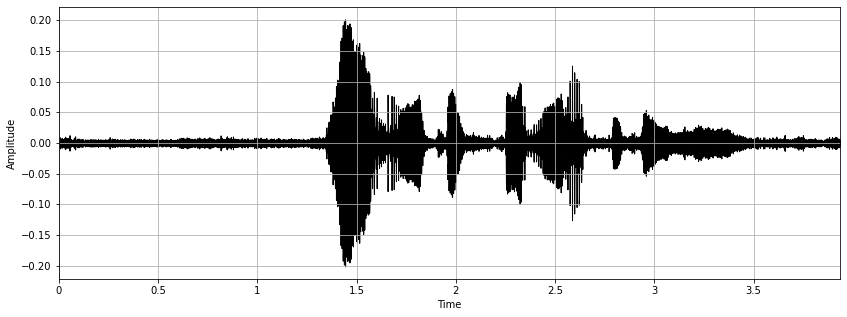

In [118]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=SR, color="black")
plt.ylabel("Amplitude")
plt.grid()

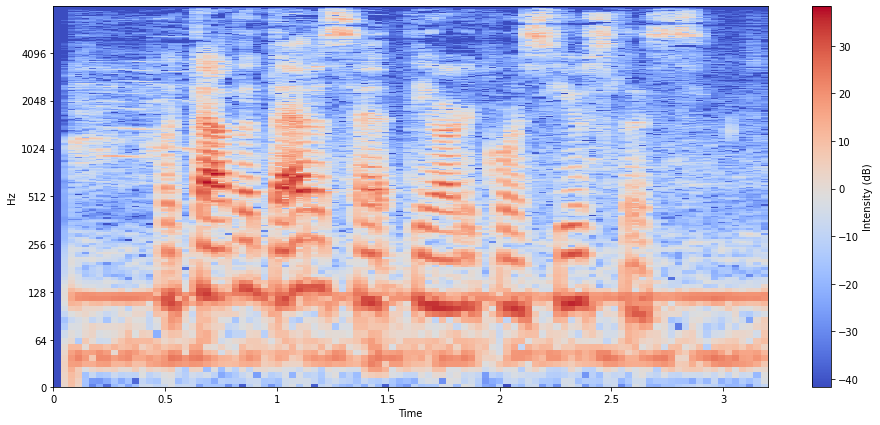

In [119]:
YCW = librosa.stft(cw)
Ydb = librosa.amplitude_to_db(abs(YCW))
plt.figure(figsize=(16, 7))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")

In [120]:
carlini_perturbed_audio_data = '/content/drive/MyDrive/Audio_Analysis/perturbed.wav'
cwp , sr = librosa.load(carlini_perturbed_audio_data)
print(cwp,sr)

cwp,sr = librosa.load(carlini_perturbed_audio_data, sr=None)

print(sr)

[-0.00133227 -0.00256476 -0.00314685 ... -0.03087058 -0.02500104
  0.        ] 22050
16000


In [121]:
ipd.Audio(carlini_perturbed_audio_data)

In [122]:
def calculate_snr(original, noisy):
    original = np.asarray(original)
    noisy = np.asarray(noisy)
    original_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    snr = 10 * np.log10(original_power / noise_power)
    return snr
SNR=calculate_snr(cw,cwp)
print("The SNR of signal is ", SNR)

The SNR of signal is  26.470160484313965


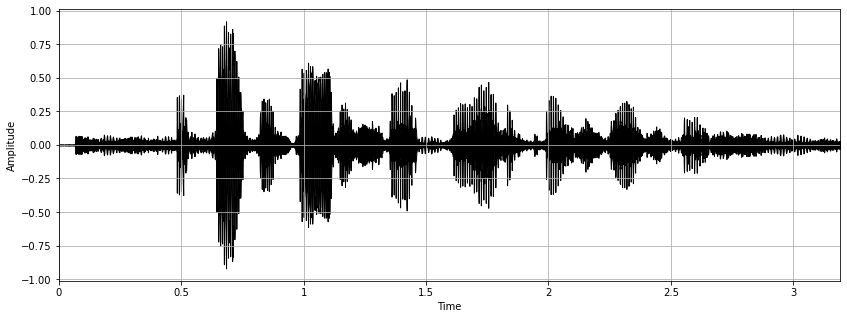

In [123]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(cwp, sr=sr, color="black")
plt.ylabel("Amplitude")
plt.grid()

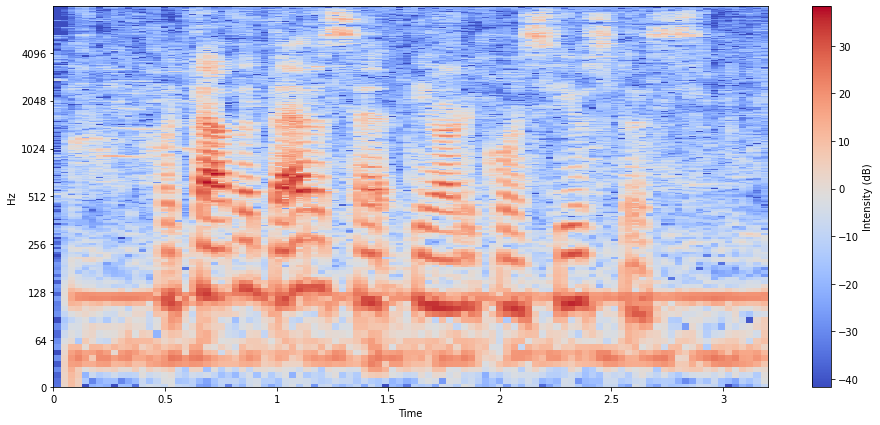

In [124]:
YCWP = librosa.stft(cwp)
YCWPdb = librosa.amplitude_to_db(abs(YCWP))
plt.figure(figsize=(16, 7))
librosa.display.specshow(YCWPdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")